# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
#print(X) #it is 2D array
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
print(y) #it is 1D array

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
#StandardScalar need array as 2D array, hence we need to convert 1D array to 2D array using reshape
#rows=len(y) cols=1 and overwrite y
y = y.reshape(len(y),1)  

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling
<ul>
    <li>don't apply feature scaling,  to some dummy variables resulting from one-hot encoding.</li>
    <li> when a dependent variable takes binary values like 0 and 1, you don't have to apply feature scaling either because the values are already in the right range.</li>
    <li>when the dependent variable takes super high values with respect to the other features, then you have to apply feature scaling</li>
</ul>

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #this will use mean and statdard deviation of x axis i.e level
sc_y = StandardScaler() #this will use mean and statdard deviation of y array i.e salary
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [8]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset
<p>in support vector machine(SVM) you may choose kernel, based on your data, it may be linear or non linear</p>
<p>refer https://data-flair.training/blogs/svm-kernel-functions/ to choose appropriate kernel</p>

In [10]:

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\anilk\anaconda311\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [11]:
#since we are using Standard scaler for scaling the value of level and salary
#we need to send the scaled value of level 6.5 to predict function,
#we are using [[]] because predict needs 2D array
result=regressor.predict(sc_X.transform([[6.5]]))
#the result is also the scalled value of salary hence we need to inverse transform to get actual value                    
sc_y.inverse_transform(result.reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

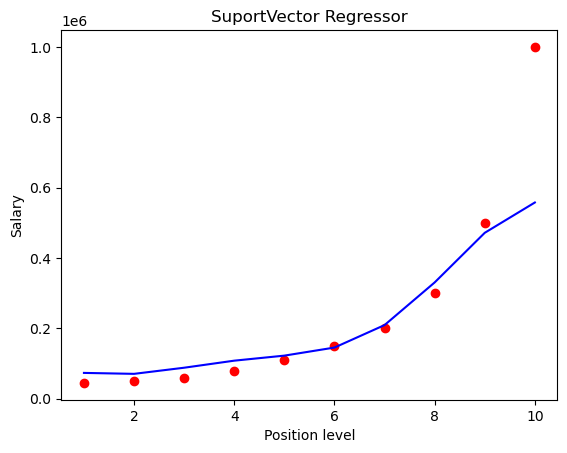

In [12]:
#inverse_transform will plot the graph for original values and not scalled value
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('SuportVector Regressor')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

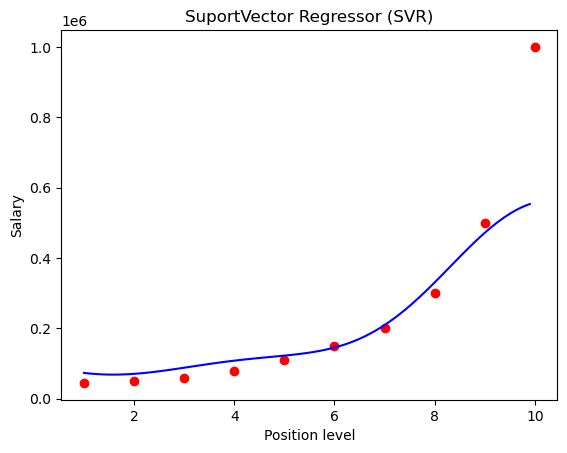

In [13]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('SuportVector Regressor (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()